# 1. Линейная алгебра: аппроксимация функций

### Практика:
1.	решение системы линейных уравнений
2.	приближение функции с помощью многочленов#


### Исходные данные:
Для работы выберем гладкую сложную математическую функцию

$$f(x) = 3*cos( \frac{10x}{7})+exp(\frac{x}{10})$$
на отрезке [1, 15]

In [1]:
def f(x):
    return(3*np.cos((10*x)/7) + np.exp(x/10))
    #return(np.sin(x/5) * np.exp(x/10) + 5 * np.exp(-x/2))
def func(w,x):
    return sum([w*(x**i) for i, w in enumerate(w)])

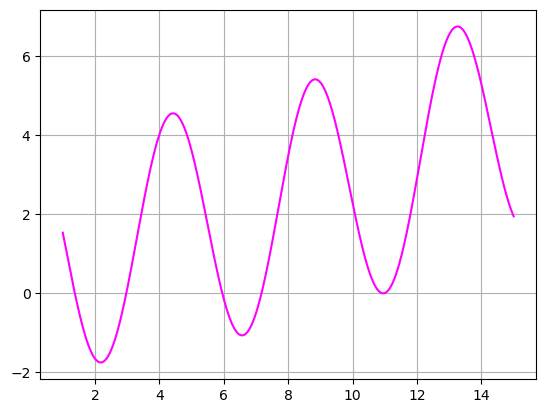

In [2]:
#Построим график функции
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

x = np.arange(1, 15, 0.001)
plt.plot(x, f(x), color = 'magenta')
plt.grid()
plt.show()

In [3]:
A = np.array([[1,1],[1,15]])
b = np.array([f(1),f(15)])
w = linalg.solve(A, b)
print(w)


[1.50086358 0.02954503]


In [4]:
#шаг 1
x_n = np.array([1, 15], dtype = float)
A = np.array([x_n ** i for i in range(x_n.shape[0])]).T
b = f(x_n)
w = linalg.solve(A, b)
print(w)


[1.50086358 0.02954503]


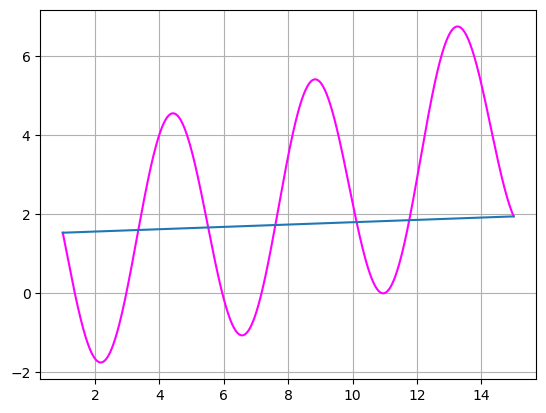

In [5]:
#строим график для шага 1
plt.plot(x, f(x), color = 'magenta')
plt.plot(x,func(w,x))
plt.grid()
plt.show()

In [6]:
#шаг 2
x1_n = np.array([1, 8, 15], dtype = float)
A1 = np.array([x1_n ** i for i in range(x1_n.shape[0])]).T
b1 = np.array([f(1),f(8),f(15)])
w1 = linalg.solve(A1, b1)
print(w1)


[ 0.96603803  0.60002561 -0.03565504]


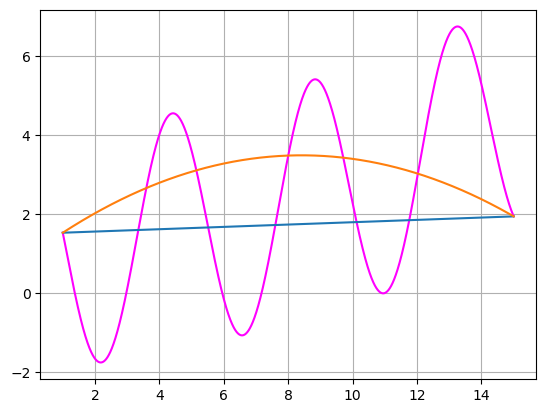

In [7]:
x = np.arange(1, 15, 0.001)

plt.plot(x, f(x), color = 'magenta')
plt.plot(x,func(w,x))
plt.plot(x,func(w1,x))
plt.grid()
plt.show()

In [8]:
#шаг 3
x2_n = np.array([1, 4, 10, 15], dtype = float)
A2 = np.array([x2_n ** i for i in range(x2_n.shape[0])]).T
b2 = np.array([f(1),f(4),f(10),f(15)])
w2 = linalg.solve(A2, b2)
print(w2)

[-0.2113041   2.01114189 -0.27978149  0.01035231]


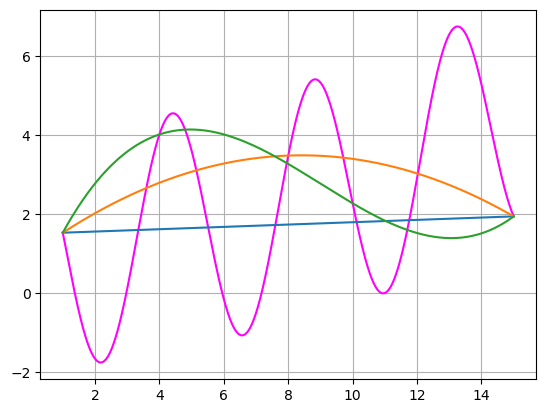

In [9]:
x = np.arange(1, 15, 0.001)

plt.plot(x, f(x), color = 'magenta')
plt.plot(x,func(w,x))
plt.plot(x,func(w1,x))
plt.plot(x,func(w2,x))
plt.grid()
plt.show()

In [10]:
h = w2.tolist()
h = [round(i, 2) for i in h]
with open('res_1.txt','w') as file:
    print(*h, file=file)

### Хорошо ли он аппроксимирует функцию? 

Вывод: при выборе нашей функции точность данного метода аппроксимации не достаточно высока, поэтому нельзя сказать, что функция была хорошо аппроксимирована. При выборе другой функции данный метод может сработать достаточно точно. Например:
$$f(x) = 3*cos( \frac{x}{7})+exp(\frac{x}{10})$$